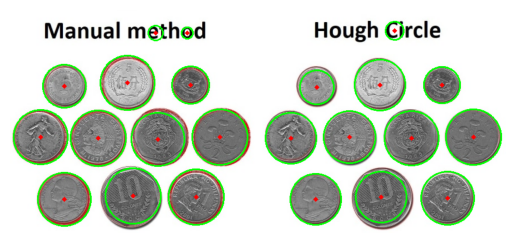

In [54]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread('inrj1m7g4k7w50qokib2.jpg', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve circle detection
blurred = cv2.GaussianBlur(gray, (9, 9), 2)

# Detect circles using Hough Circle Transform
circles = cv2.HoughCircles(
    blurred,
    cv2.HOUGH_GRADIENT,
    #ปรับค่าให้เหมาะสมกับภาพ
    dp=1,  # Inverse ratio of the accumulator resolution
    minDist=50,  # Minimum distance between the centers of the detected circles
    param1=20,  # Upper threshold for the internal Canny edge detector
    param2=27,   # Threshold for circle center detection
    minRadius=10,  # Minimum radius of circles to be detected
    maxRadius=50   # Maximum radius of circles to be detected
    ###########
)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        center = (circle[0], circle[1])
        radius = circle[2]
        
        # Draw the circle and center
        cv2.circle(image, center, radius, (0, 255, 0), 2)
        cv2.circle(image, center, 2, (0, 0, 255), 3)

# Display the result using Matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
